<a href="https://colab.research.google.com/github/Suchir2004/pbl_alzmer/blob/main/alzmer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/sample_data/oasis_longitudinal.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [5]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
df.head(5)

Tota Rows and Columns (Rows,Columns) :  (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [8]:
sum(df.duplicated())

0

In [9]:
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

<Axes: xlabel='Group', ylabel='count'>

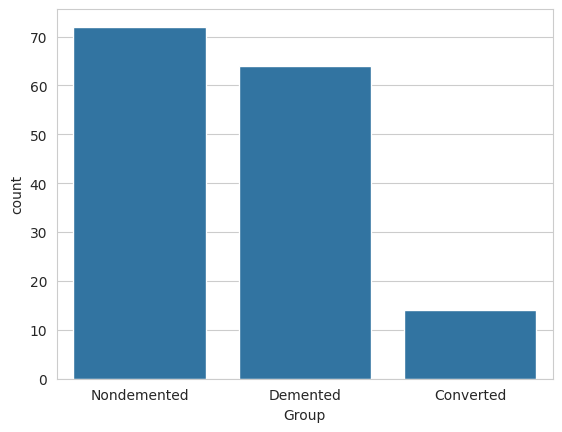

In [10]:
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

<ipython-input-11-f052a051643f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])


<Axes: xlabel='Group', ylabel='count'>

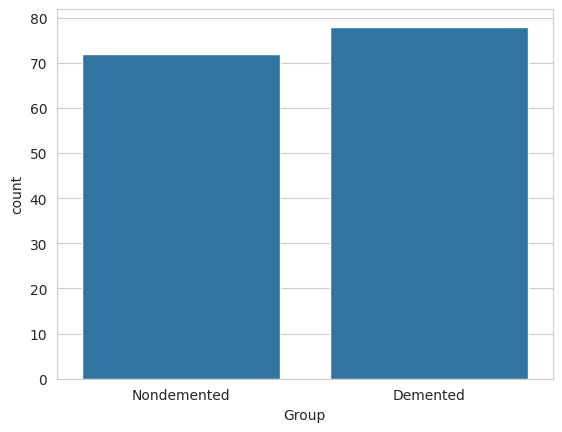

In [11]:
ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

M/F           M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

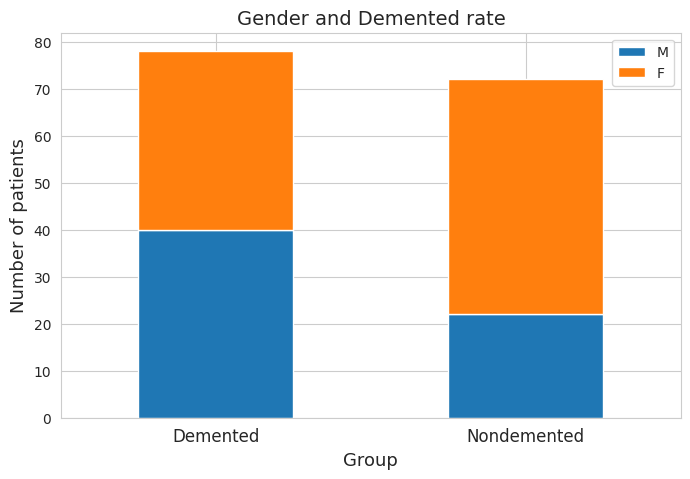

In [12]:
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)

bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

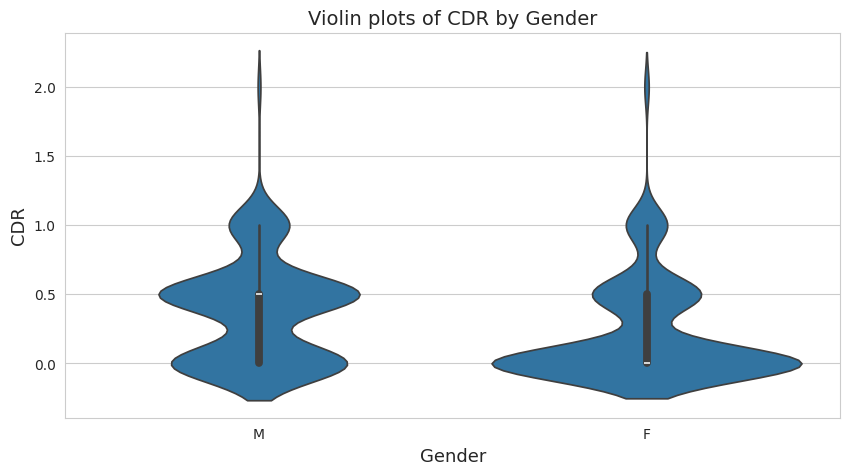

In [13]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

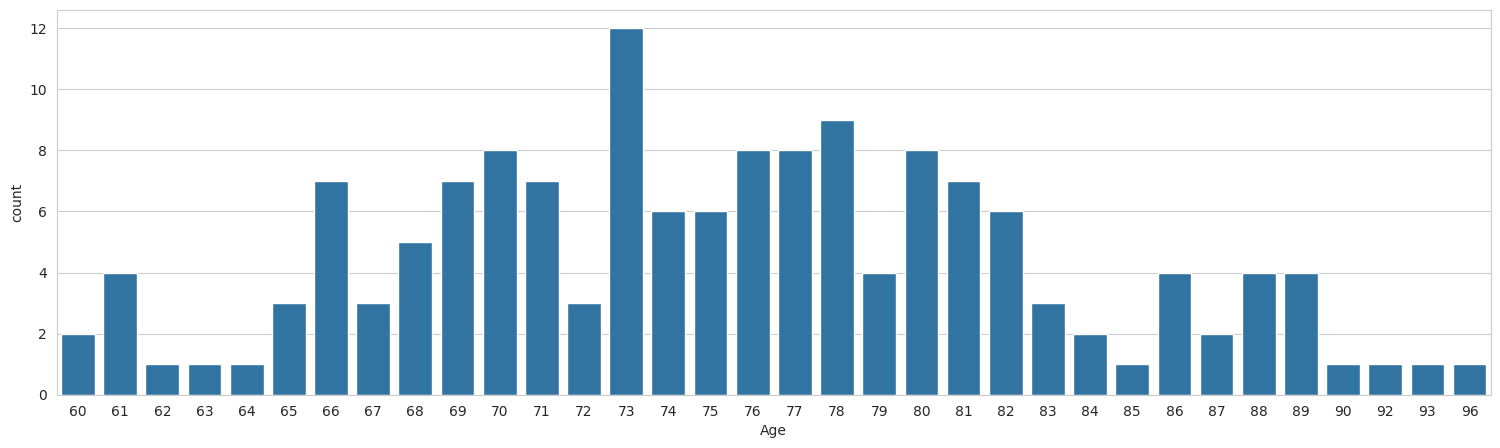

In [14]:
ax = sns.countplot(x='Age', data=ex_df)
ax.figure.set_size_inches(18.5, 5)

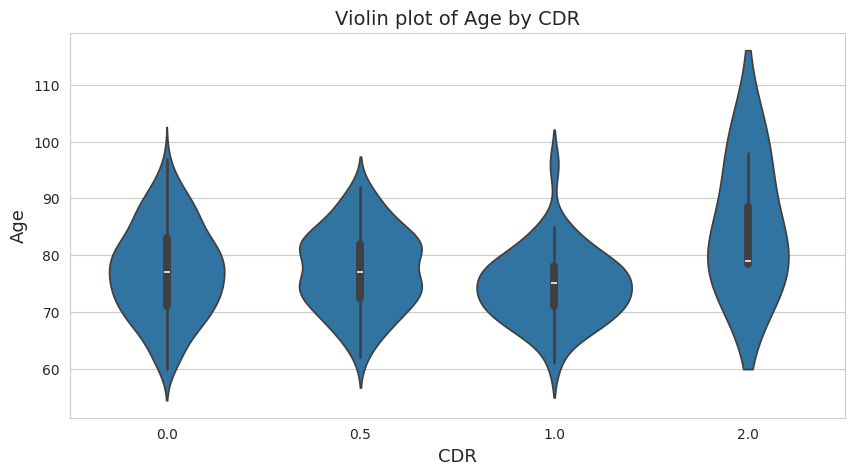

In [15]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(50.0, 100.0)

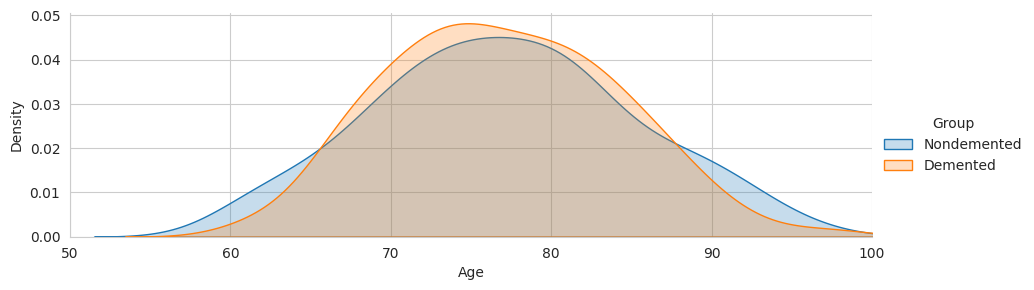

In [16]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(15.3, 30.0)

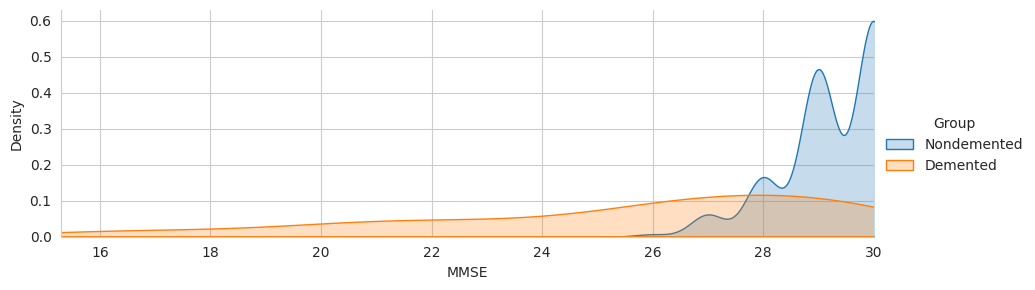

In [17]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

In [18]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369]),)
EDUC :  (array([107, 108, 109]),)
SES :  (array([136, 137, 138, 161, 162, 179, 180]),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366]),)
eTIV :  (array([0, 1]),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282]),)


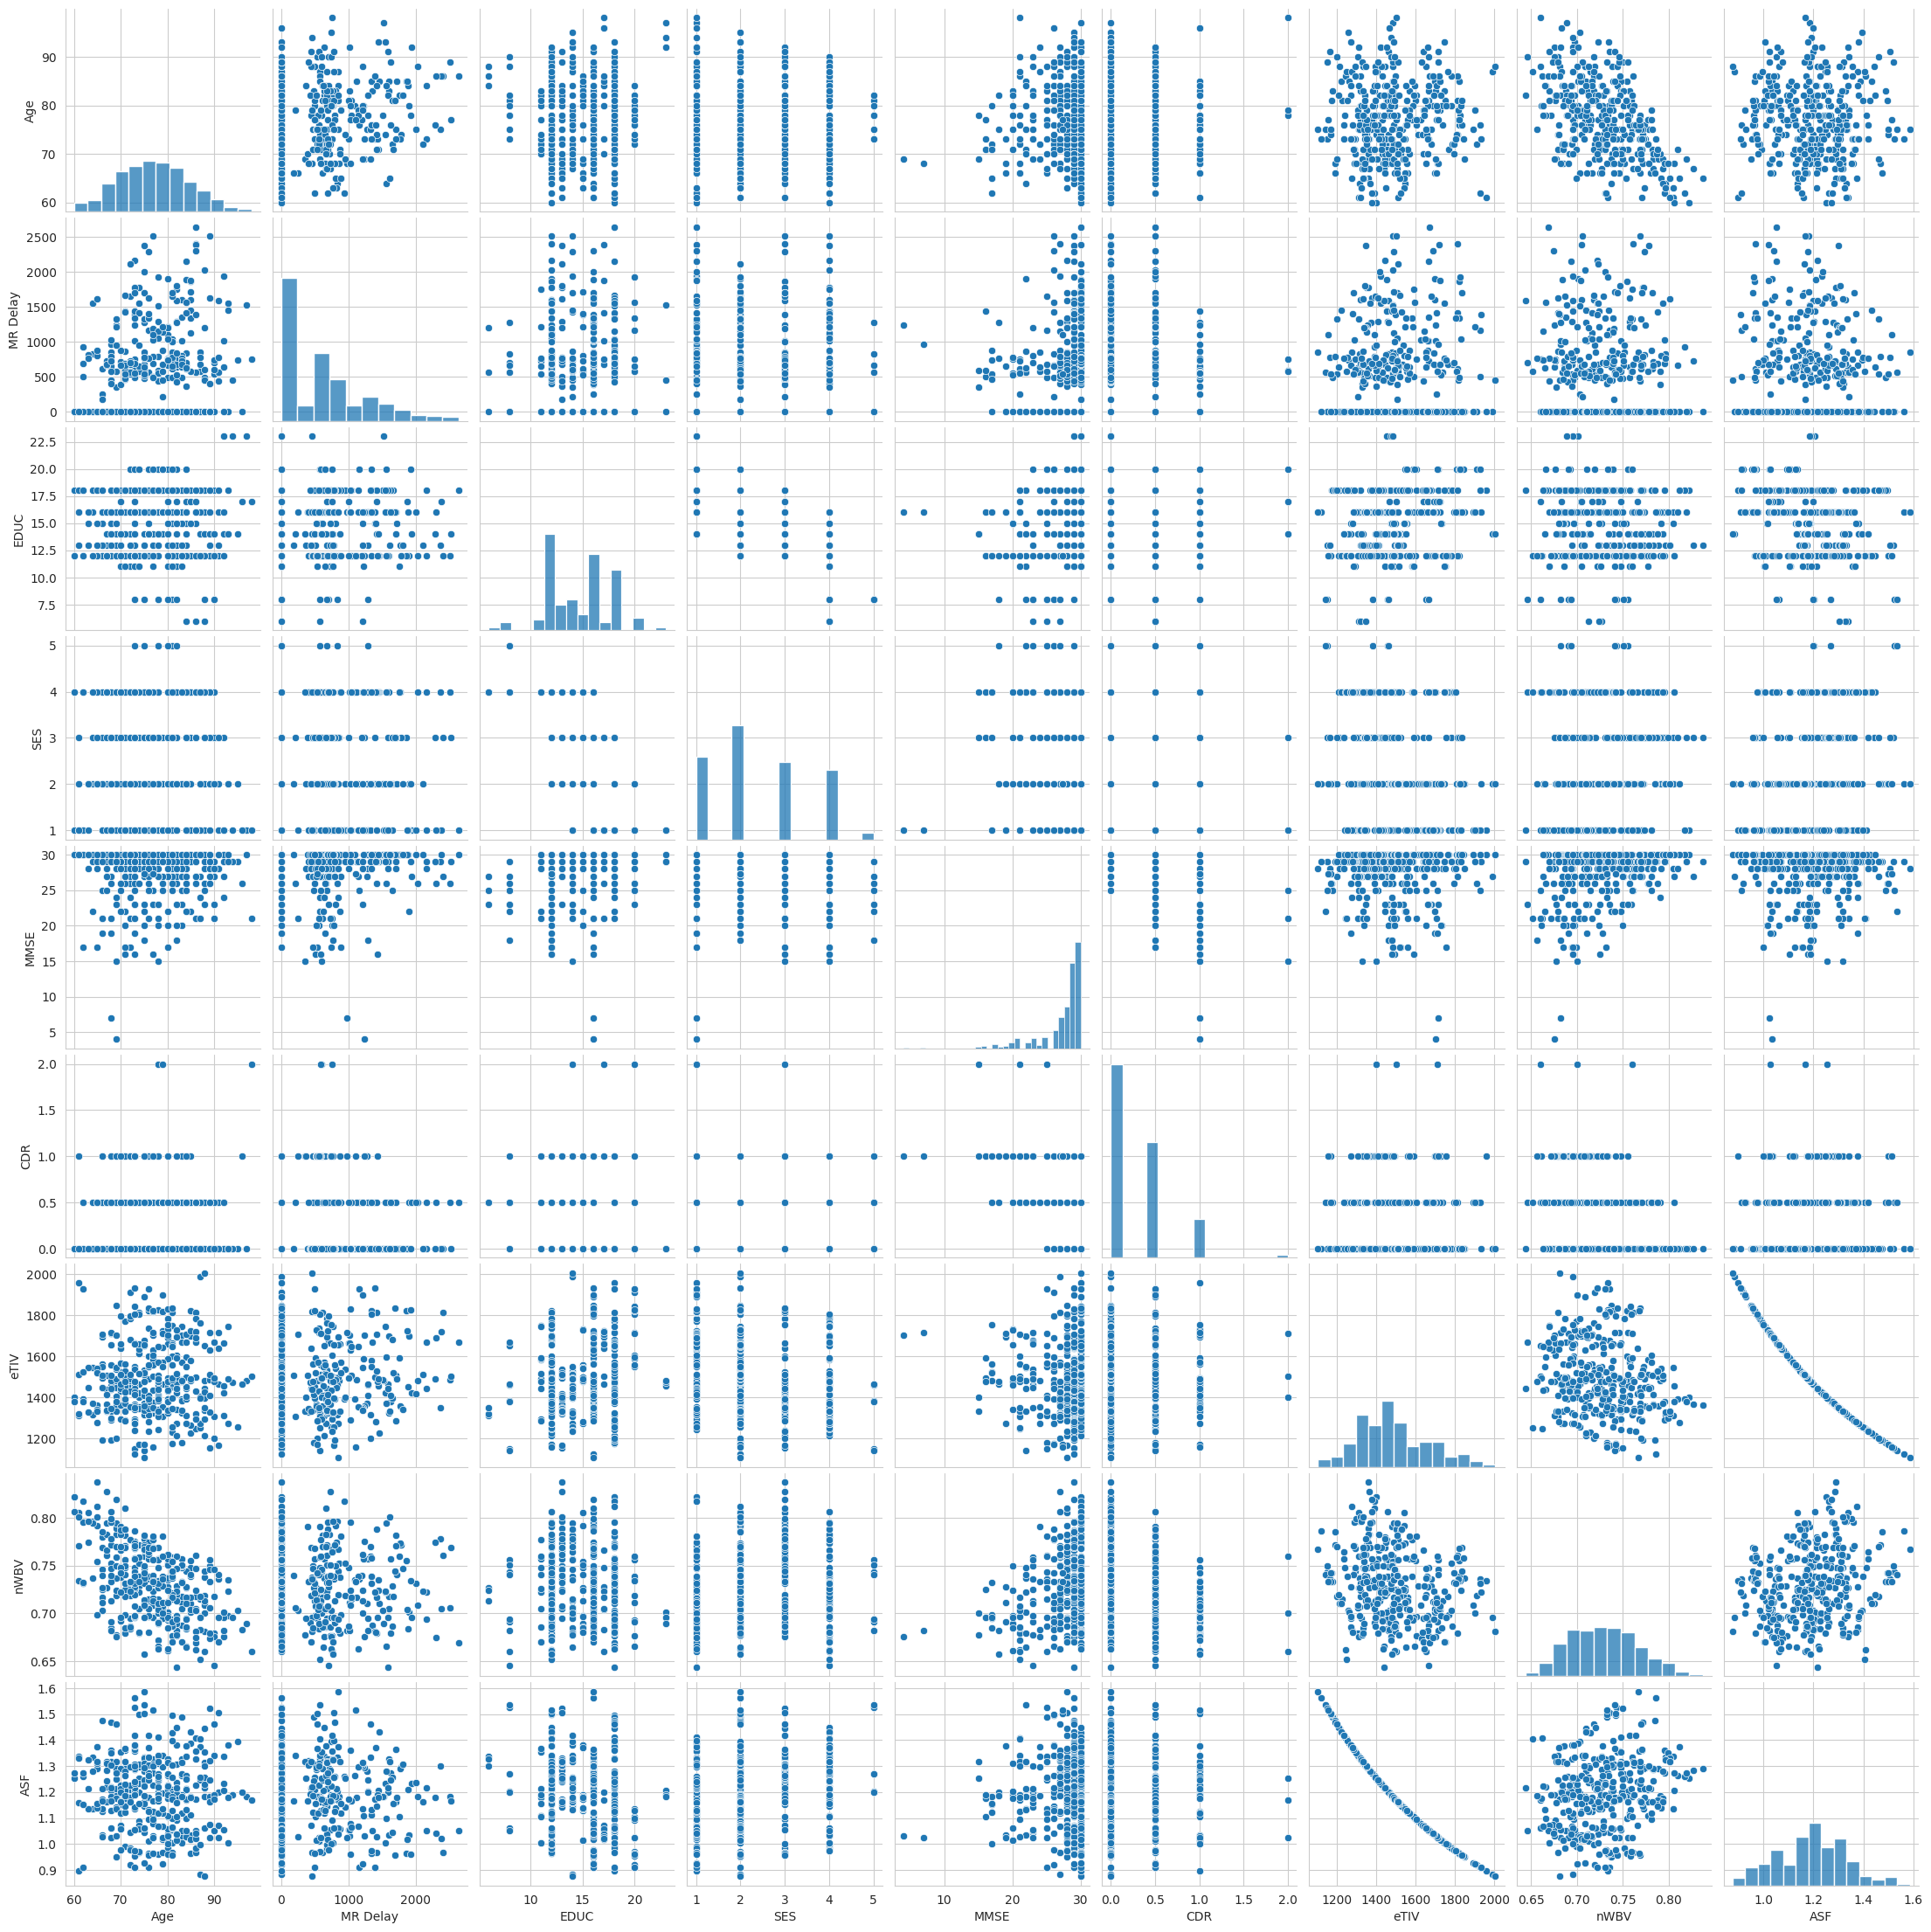

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=df.fillna('')
sns_plot = sns.pairplot(x[cols])

<ipython-input-20-2303dda95d4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
<ipython-input-20-2303dda95d4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
<ipython-input-20-2303dda95d4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
<ipython-input-20-2303dda95d4e>:7: FutureWarning: 

Passing `palette` w

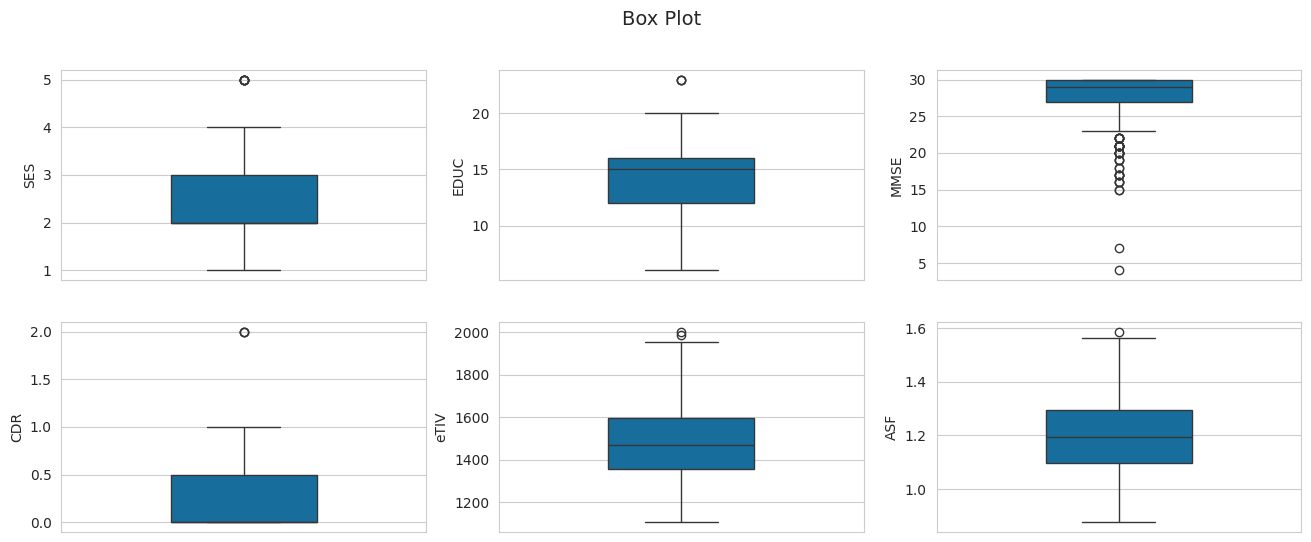

In [20]:
fig, axes = plt.subplots(2,3,figsize = (16,6))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);
#xlabel("Time");

In [21]:
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

In [24]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

In [26]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [27]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [29]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [30]:
total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier',
                    'ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier',
                    'MLPClassifier','GaussianNB','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

In [31]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[45  7]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.88      0.82      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



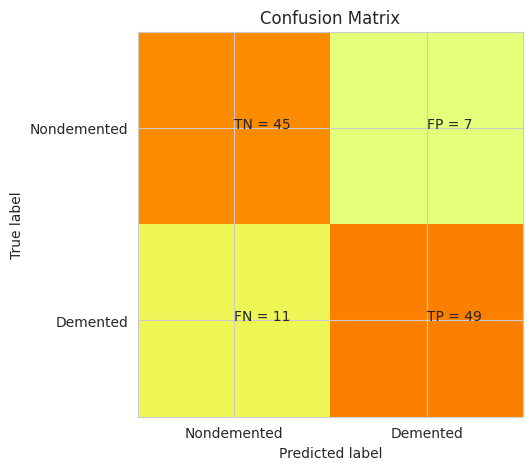

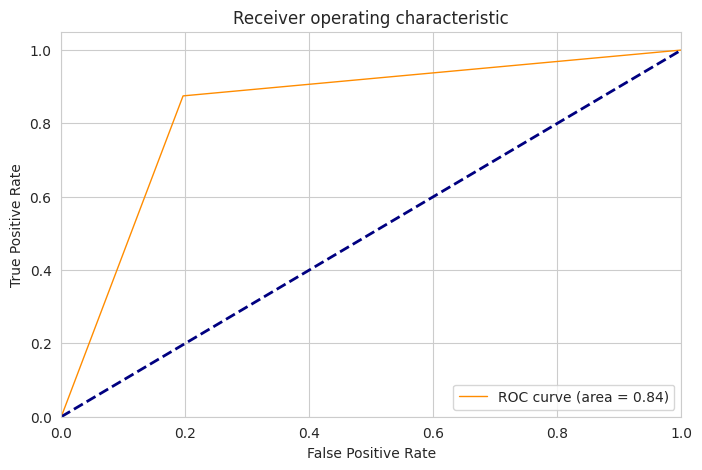


Acuuracy Of the Model:  0.8392857142857143 




In [32]:
rfc=RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc)
roc_curves(CV_rfc)
accuracy(CV_rfc)



Confusion Matrix:
[[46  6]
 [19 41]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        52
           1       0.87      0.68      0.77        60

    accuracy                           0.78       112
   macro avg       0.79      0.78      0.78       112
weighted avg       0.80      0.78      0.78       112



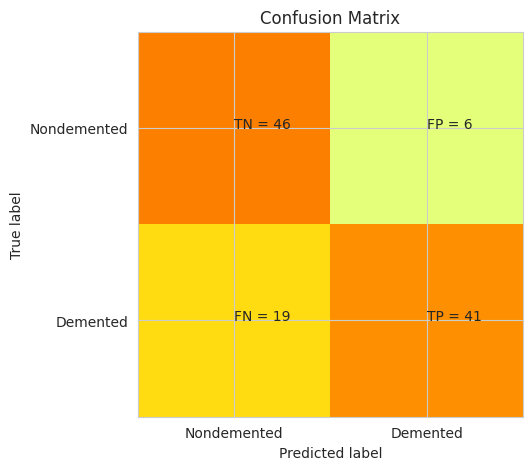

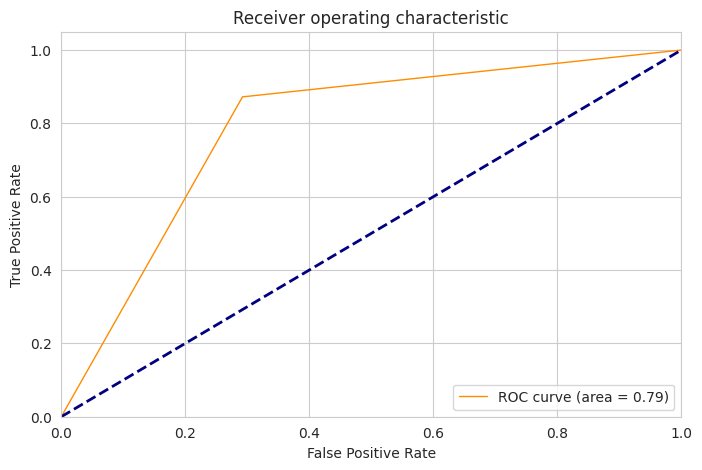


Acuuracy Of the Model:  0.7767857142857143 




In [33]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm)
roc_curves(svm)
accuracy(svm)



Confusion Matrix:
[[43  9]
 [14 46]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        52
           1       0.84      0.77      0.80        60

    accuracy                           0.79       112
   macro avg       0.80      0.80      0.79       112
weighted avg       0.80      0.79      0.79       112



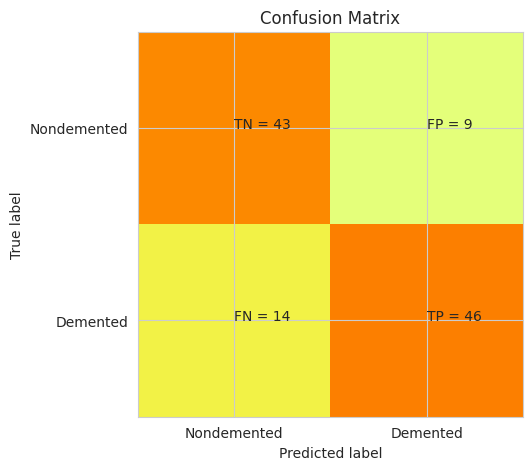

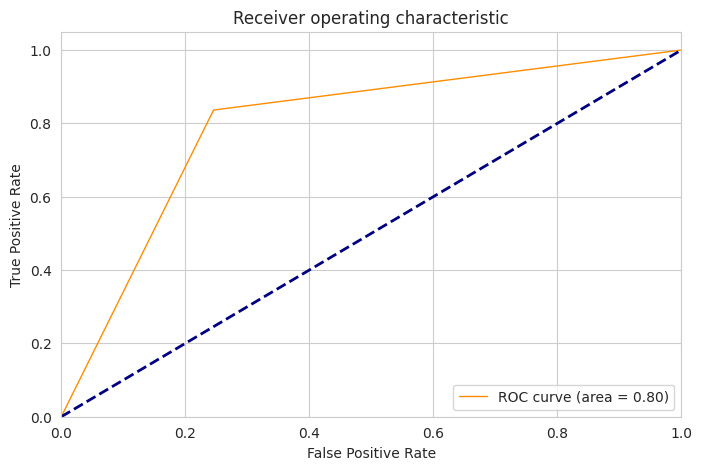


Acuuracy Of the Model:  0.7946428571428571 




In [34]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc)
roc_curves(clf_dtc)
accuracy(clf_dtc)



Confusion Matrix:
[[44  8]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.86      0.83      0.85        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



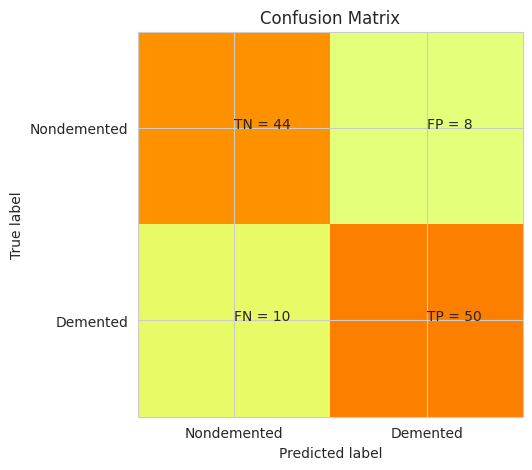

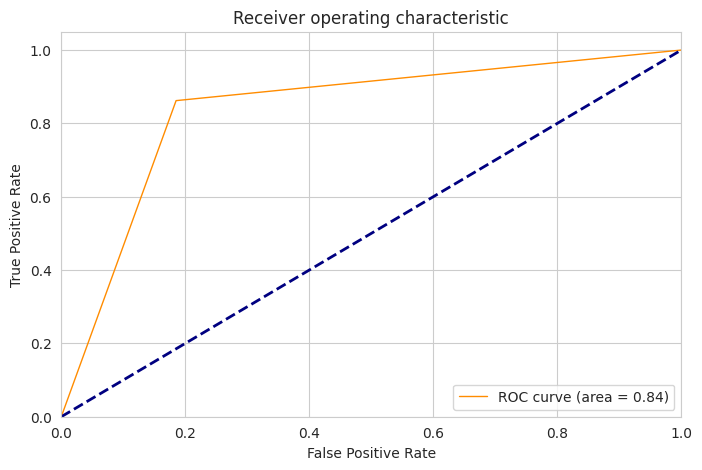


Acuuracy Of the Model:  0.8392857142857143 




In [35]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb)
roc_curves(clf_xgb)
accuracy(clf_xgb)

In [36]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 98, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 208, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471154 -> initscore=-0.115513
[LightGBM] [Info] Start training from score -0.115513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 99, number of negative: 110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473684 -> initscore=-0.105361
[LightGBM] [Info] Start training from score -0.105361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 99, number of negative: 110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473684 -> initscore=-0.105361
[LightGBM] [Info] Start training from score -0.105361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 98, number of negative: 111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468900 -> initscore=-0.124563
[LightGBM] [Info] Start training from score -0.124563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 98, number of negative: 111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468900 -> initscore=-0.124563
[LightGBM] [Info] Start training from score -0.124563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 123, number of negative: 138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 261, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471264 -> initscore=-0.115069
[LightGBM] [Info] Start training from score -0.115069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

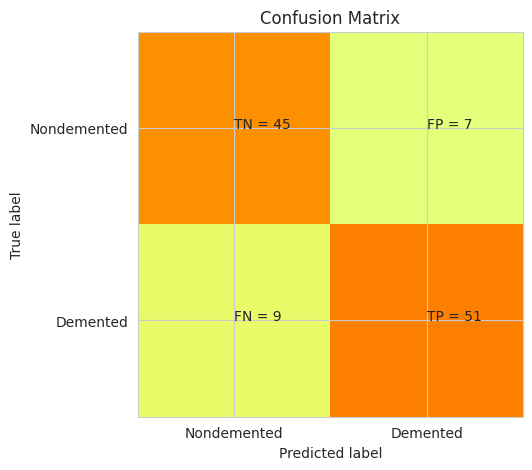

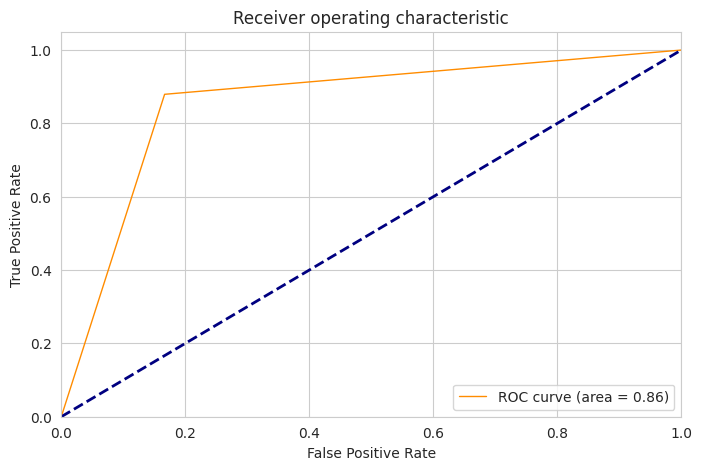


Acuuracy Of the Model:  0.8571428571428571 




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 98, number of negative: 110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 208, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471154 -> initscore=-0.115513
[LightGBM] [Info] Start training from score -0.115513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 99, number of negative: 110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473684 -> initscore=-0.105361
[LightGBM] [Info] Start training from score -0.105361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 99, number of negative: 110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473684 -> initscore=-0.105361
[LightGBM] [Info] Start training from score -0.105361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 98, number of negative: 111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468900 -> initscore=-0.124563
[LightGBM] [Info] Start training from score -0.124563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 98, number of negative: 111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468900 -> initscore=-0.124563
[LightGBM] [Info] Start training from score -0.124563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[LightGBM] [Info] Number of positive: 123, number of negative: 138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 261, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471264 -> initscore=-0.115069
[LightGBM] [Info] Start training from score -0.115069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

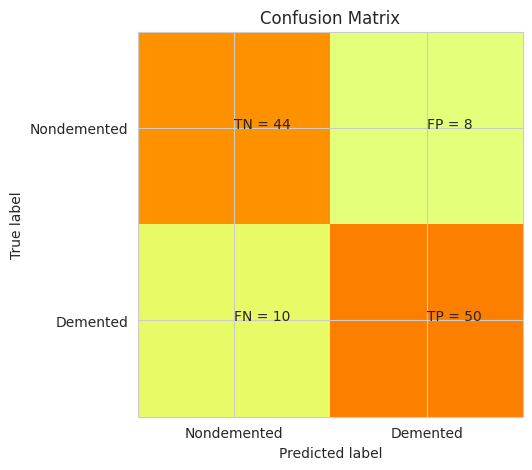

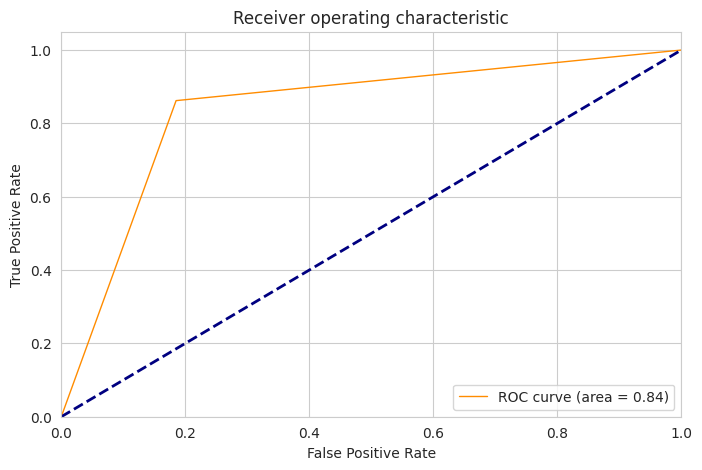


Acuuracy Of the Model:  0.8392857142857143 




In [37]:
vote_est = [('etc',ensemble.ExtraTreesClassifier()),
            ('gb',GradientBoostingClassifier()),
            ('abc',AdaBoostClassifier()),
    ('rfc', ensemble.RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)),
    #('svc', svm.SVC(probability=True)),
    #('xgb', XGBClassifier()),
            ('lbgm',LGBMClassifier())
           ]


vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train.ravel())
vote_hard.fit(X_train, y_train.ravel())
report_performance(vote_hard)
roc_curves(vote_hard)
accuracy(vote_hard)
#pred = vote_hard.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")

vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train.ravel())
vote_soft.fit(X_train, y_train.ravel())
report_performance(vote_soft)
roc_curves(vote_soft)
accuracy(vote_soft)
#pred = vote_soft.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")

In [38]:
clfs =[LGBMClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),
          MLPClassifier(alpha=1),GaussianNB(),LogisticRegression()]

LGBMClassifier : 
[LightGBM] [Info] Number of positive: 123, number of negative: 138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 261, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471264 -> initscore=-0.115069
[LightGBM] [Info] Start training from score -0.115069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

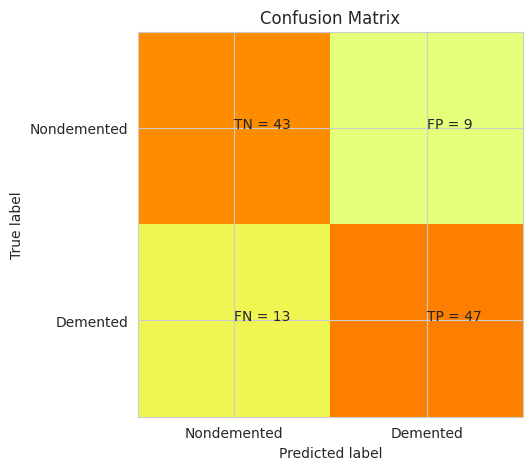

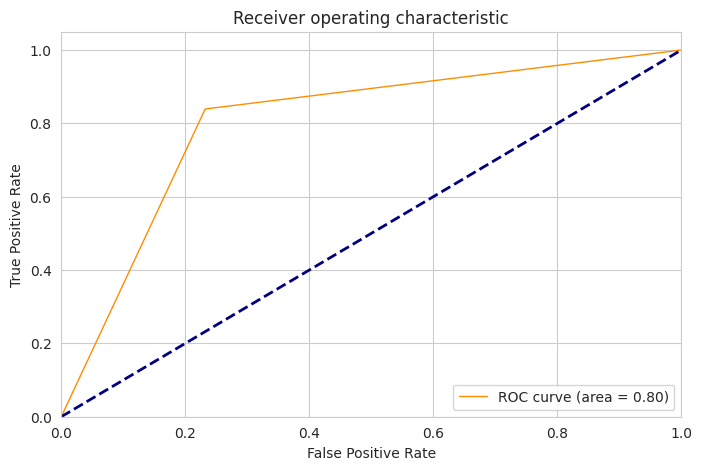


Acuuracy Of the Model:  0.8035714285714286 


ExtraTreesClassifier : 


Confusion Matrix:
[[46  6]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        52
           1       0.89      0.83      0.86        60

    accuracy                           0.86       112
   macro avg       0.86      0.86      0.86       112
weighted avg       0.86      0.86      0.86       112



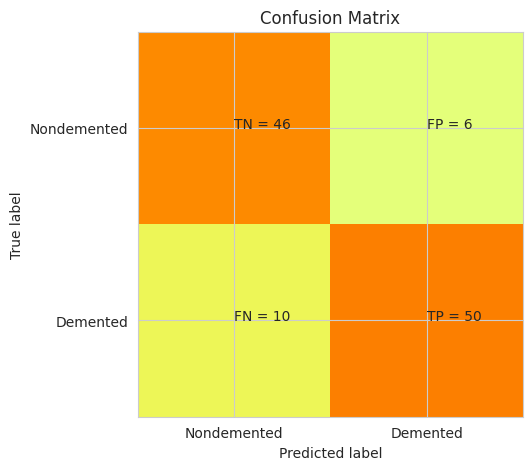

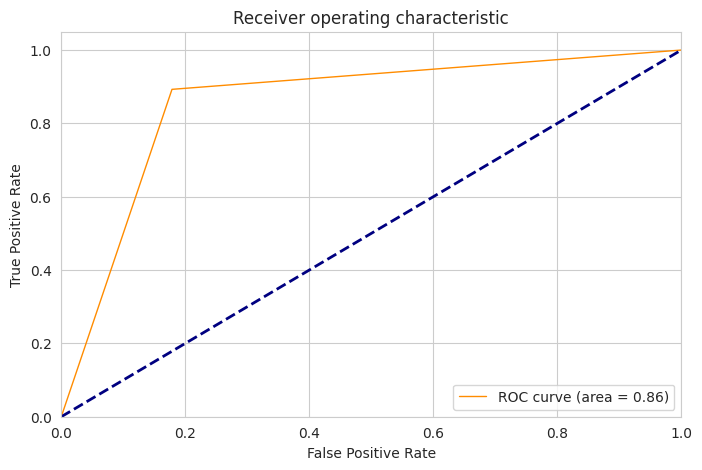


Acuuracy Of the Model:  0.8571428571428571 


GradientBoostingClassifier : 


Confusion Matrix:
[[45  7]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.88      0.82      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



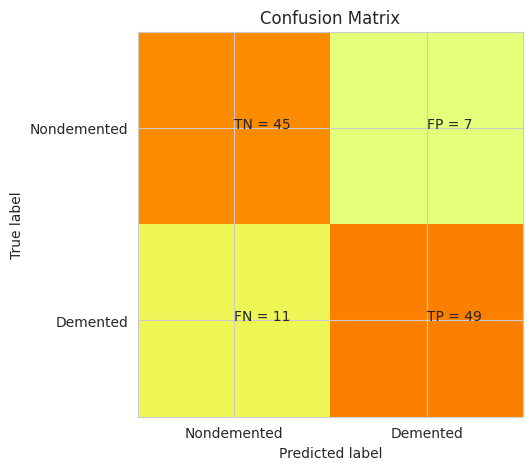

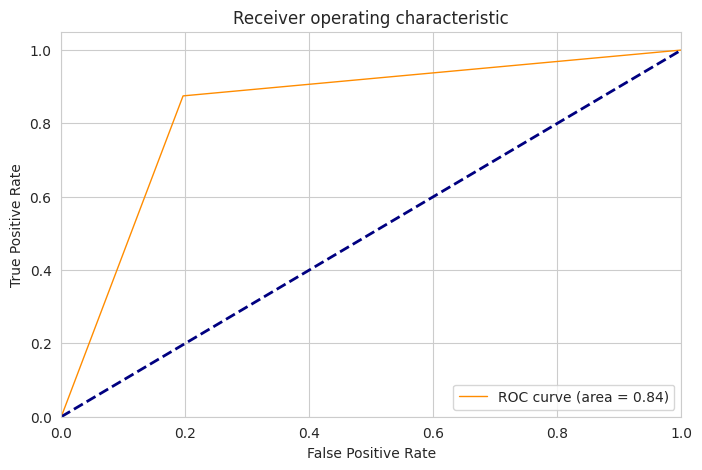


Acuuracy Of the Model:  0.8392857142857143 


AdaBoostClassifier : 


Confusion Matrix:
[[41 11]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        52
           1       0.82      0.82      0.82        60

    accuracy                           0.80       112
   macro avg       0.80      0.80      0.80       112
weighted avg       0.80      0.80      0.80       112



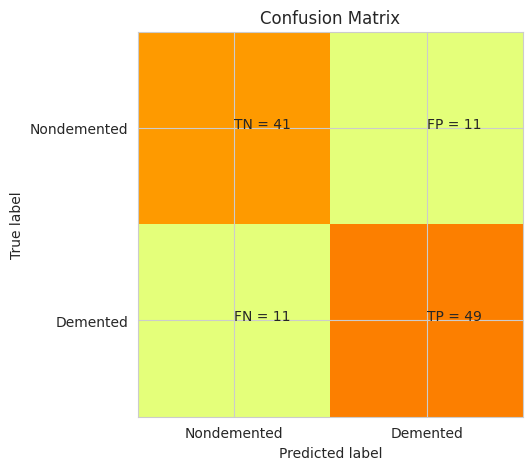

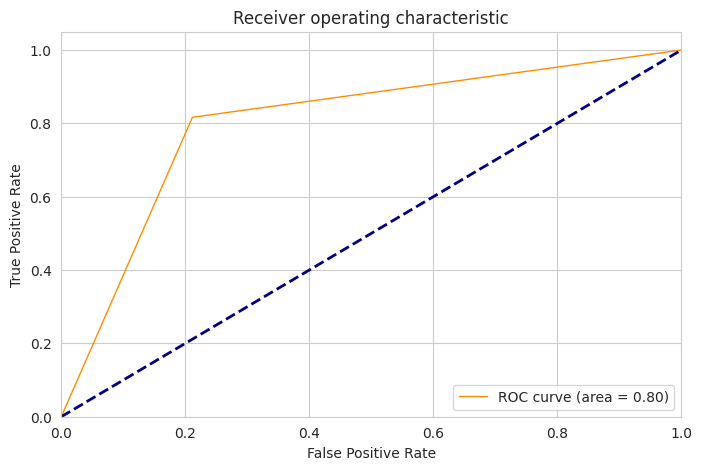


Acuuracy Of the Model:  0.8035714285714286 


KNeighborsClassifier : 


Confusion Matrix:
[[42 10]
 [27 33]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.81      0.69        52
           1       0.77      0.55      0.64        60

    accuracy                           0.67       112
   macro avg       0.69      0.68      0.67       112
weighted avg       0.69      0.67      0.67       112



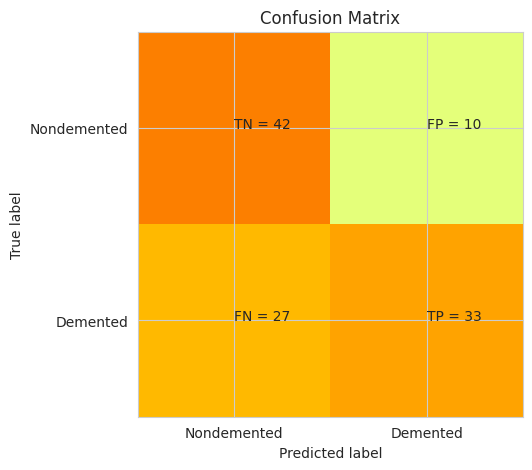

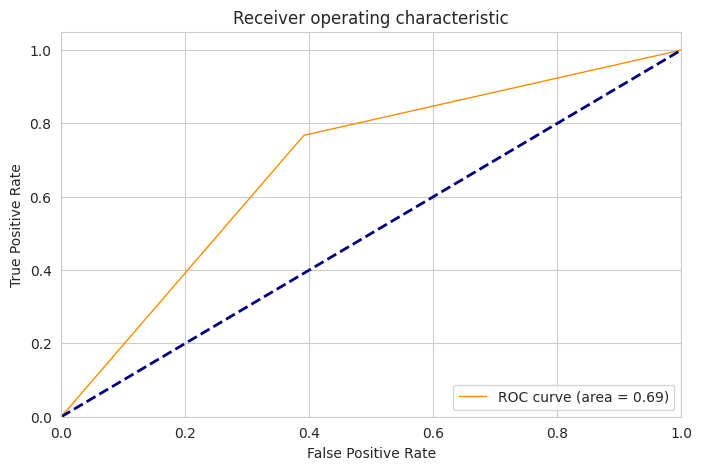


Acuuracy Of the Model:  0.6696428571428571 


MLPClassifier : 


Confusion Matrix:
[[42 10]
 [13 47]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        52
           1       0.82      0.78      0.80        60

    accuracy                           0.79       112
   macro avg       0.79      0.80      0.79       112
weighted avg       0.80      0.79      0.79       112



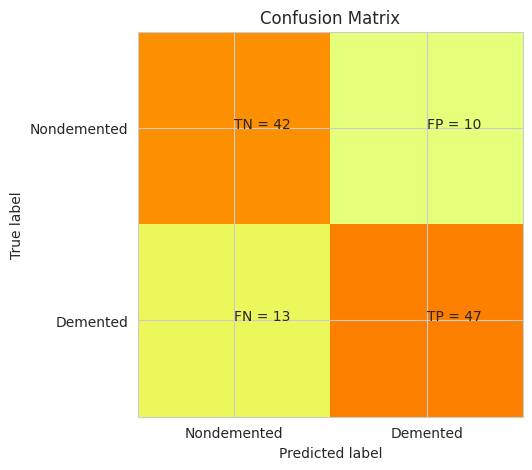

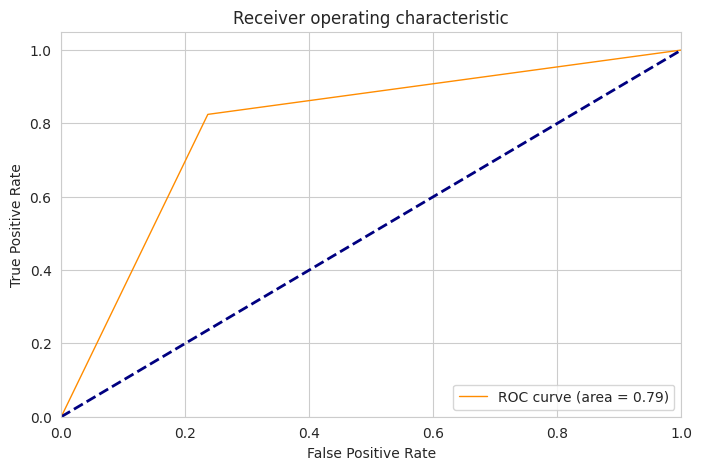


Acuuracy Of the Model:  0.7946428571428571 


GaussianNB : 


Confusion Matrix:
[[44  8]
 [22 38]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        52
           1       0.83      0.63      0.72        60

    accuracy                           0.73       112
   macro avg       0.75      0.74      0.73       112
weighted avg       0.75      0.73      0.73       112



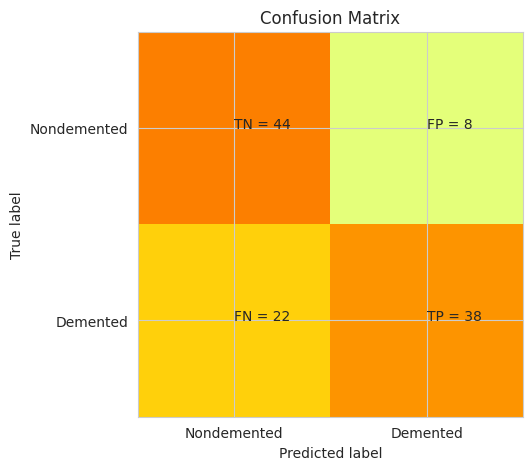

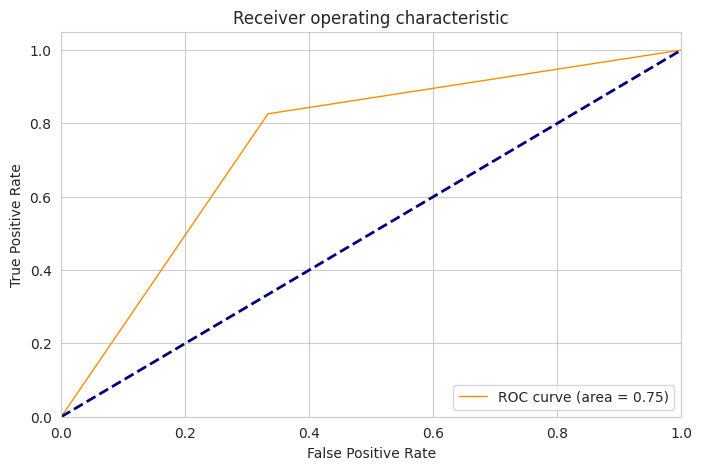


Acuuracy Of the Model:  0.7321428571428571 


LogisticRegression : 


Confusion Matrix:
[[40 12]
 [18 42]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        52
           1       0.78      0.70      0.74        60

    accuracy                           0.73       112
   macro avg       0.73      0.73      0.73       112
weighted avg       0.74      0.73      0.73       112



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


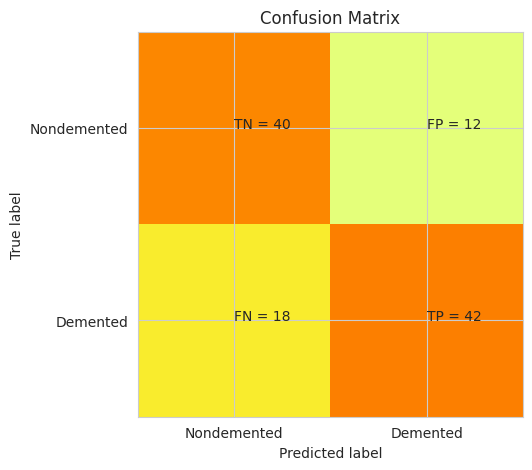

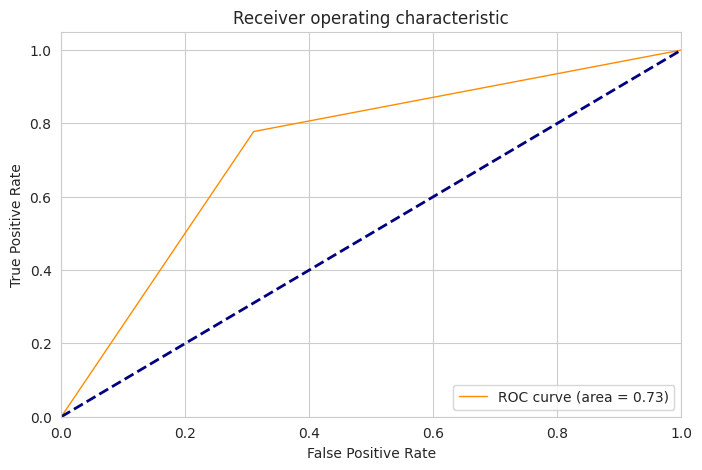


Acuuracy Of the Model:  0.7321428571428571 




In [39]:
for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_train,y_train.ravel())
    X = pd.DataFrame(X_train)
    report_performance(model)
    roc_curves(model)
    accuracy(model)

In [40]:
data = total_accuracy.values()
labels = ['RandomForest','SVC','DecisionTree','XGB','LGBM',
                    'ExtraTree','GradientBoosting','AdaBoost','KNeighbors',
                    'MLP','GaussianNB','Logistic','VotingClassifier(Soft)']

Text(0, 0.5, 'Accuracy')

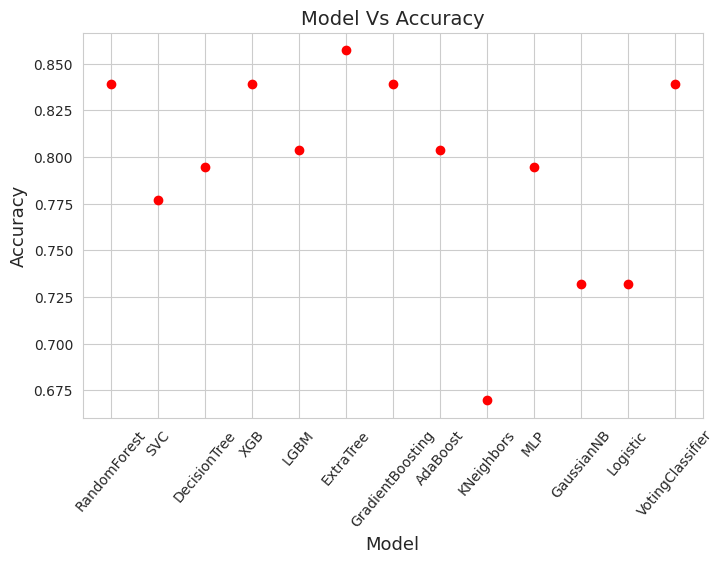

In [41]:
plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 14)
plt.xlabel('Model',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 13)